   completion_time                                                src   start  \
0              NaN  7154096942484051350240141123836620007273800952...  300000   
1              NaN  7154096942484051350240141123836620007273800952...  300000   
2              NaN  7154096942484051350240141123836620007273800952...  300000   
3              NaN  7154096942484051350240141123836620007273800952...  300000   
4              NaN  8610417392598672174149674708426764407499135979...  300000   

   column validator completed           type  samples  block_id  \
0     NaN       NaN       NaN  FindOperation      NaN       NaN   
1     NaN       NaN       NaN  FindOperation      NaN       NaN   
2     NaN       NaN       NaN  FindOperation      NaN       NaN   
3     NaN       NaN       NaN  FindOperation      NaN       NaN   
4     NaN       NaN       NaN  FindOperation      NaN       NaN   

                                            messages  hops  id  row  
0  613783|613784|613785|1978219|1978219|

Text(0.5, 0, 'Node id')

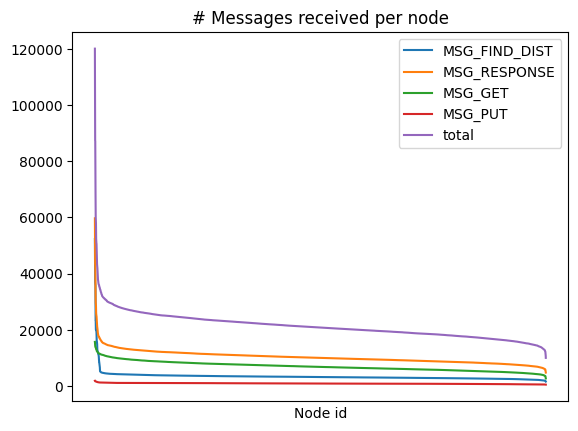

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

ops_path = "../logsDHT/operation.csv"
msgs_path = "../logsDHT/messages.csv"

op_df = pd.read_csv(ops_path,index_col=False,low_memory=False)
msg_df = pd.read_csv(msgs_path,index_col=False,low_memory=False)

fig1, ax1 = plt.subplots()

msg_types = msg_df['type'].unique()

print(op_df.head())
print(op_df['type'].unique())
print(msg_df['type'].unique())

msg_df2 = msg_df.loc[(msg_df['dst'] !='83814183170291850251680823880522715558189094423550585243365458794131648333116')]
for types in msg_types:
    #print(types)
    df2 = msg_df2.loc[(msg_df2['type'] == types)]
    df2['dst'].value_counts().plot(ax=ax1, kind='line', xticks=[], title="Message received by node", label=types)

    #print(df2['dst'])

msg_df2['dst'].value_counts().plot(ax=ax1, kind='line', xticks=[], title="Message received by node", label='total')

ax1.legend()

ax1.set_title("# Messages received per node")
ax1.set_xlabel("Node id")

Text(0.5, 1.0, '# Total messages per type')

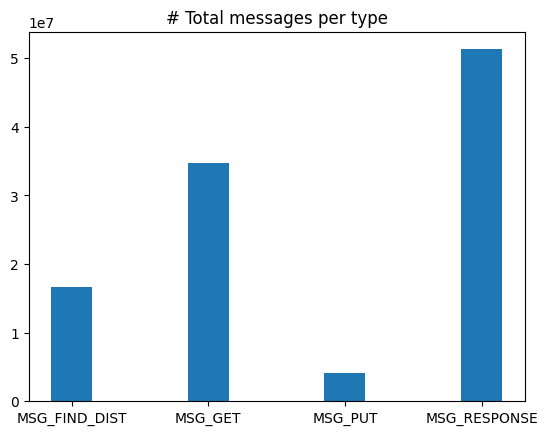

In [24]:

fig2, ax2 = plt.subplots()


table = msg_df['type'].value_counts().sort_index()
ax2.bar(np.arange(len(table.index)),table.values,width=0.3)
ticks = table.index
ax2.set_xticks(range(len(ticks)))
ax2.set_xticklabels(ticks)


ax2.set_title("# Total messages per type")



In [ ]:
fig3, ax3 = plt.subplots()


n_bins = 100
vsdf = op_df.loc[(op_df['type'] == 'ValidatorSamplingOperation')]
#print(vsdf['completion_time'].median())
#print(vsdf)
#n, bins, patches = ax3.hist(vsdf['completion_time'], n_bins, density=True, histtype='step',
 #                          cumulative=True, label='Empirical')

# sort the data in ascending order
x = np.sort(vsdf['completion_time'])
N = vsdf['completion_time'].count()
# get the cdf values of y
y = np.arange(N) / float(N)

ax3.plot(x, y)

ax3.set_xlim([0,4000])
ax3.set_ylim([0,1])
ax3.set_title("CDF Row/Column validator sampling time")
ax3.set_xlabel("Operation complete time (ms)")

Text(0.5, 0, '# hops')

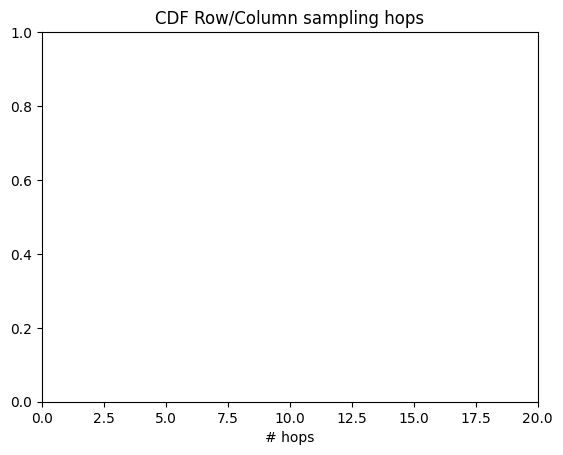

In [26]:
fig8, ax8 = plt.subplots()


#n_bins = 100
vsdf = op_df.loc[(op_df['type'] == 'ValidatorSamplingOperation')]
#print(op_df)
#print(vsdf['hops'].mode())
#n, bins, patches = ax8.hist(vsdf['hops'], n_bins, density=True, histtype='step',
 #                          cumulative=True, label='Empirical')

x = np.sort(vsdf['hops'])
N = vsdf['hops'].count()
# get the cdf values of y
y = np.arange(N) / float(N)

ax8.plot(x, y)

ax8.set_xlim([0,20])
ax8.set_ylim([0,1])

ax8.set_title("CDF Row/Column sampling hops")
ax8.set_xlabel("# hops")

Text(0.5, 0, 'Operation complete time (ms)')

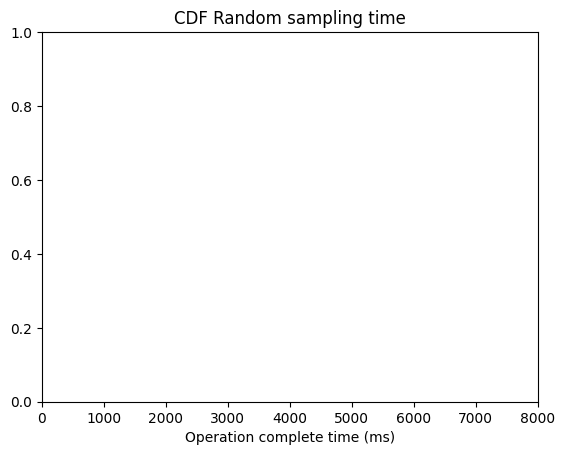

In [27]:
fig4, ax4 = plt.subplots()

#n_bins = 100
rsdf = op_df.loc[(op_df['type'] == 'RandomSamplingOperation')]

#n, bins, patches = ax4.hist(rsdf['completion_time'], n_bins, density=True, histtype='step',
#                           cumulative=True, label='Empirical')

x = np.sort(rsdf['completion_time'])
N = rsdf['completion_time'].count()
# get the cdf values of y
y = np.arange(N) / float(N)

ax4.plot(x, y)

ax4.set_xlim([0,8000])
ax4.set_ylim([0,1])

ax4.set_title("CDF Random sampling time")
ax4.set_xlabel("Operation complete time (ms)")

Text(0.5, 0, '# hops')

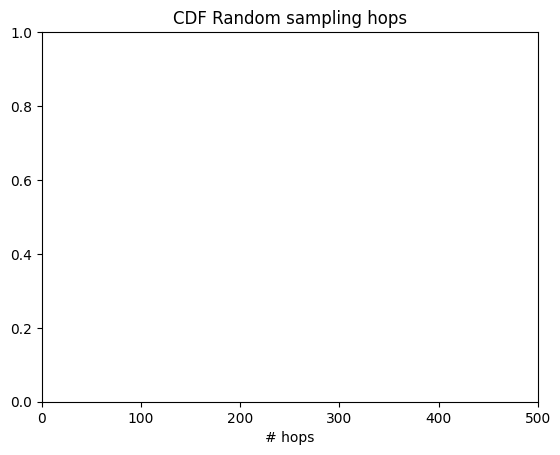

In [28]:
fig9, ax9 = plt.subplots()


#n_bins = 100
rsdf = op_df.loc[(op_df['type'] == 'RandomSamplingOperation')]
#print(op_df)
#print(vsdf['hops'].mode())
#n, bins, patches = ax9.hist(vsdf['hops'], n_bins, density=True, histtype='step',
#                           cumulative=True, label='Empirical')
x = np.sort(rsdf['hops'])
N = rsdf['hops'].count()
# get the cdf values of y
y = np.arange(N) / float(N)

ax9.plot(x, y)

ax9.set_xlim([0,500])
ax9.set_ylim([0,1])

ax9.set_title("CDF Random sampling hops")
ax9.set_xlabel("# hops")

Text(0.5, 1.0, 'Succesful / Non succesful operation')

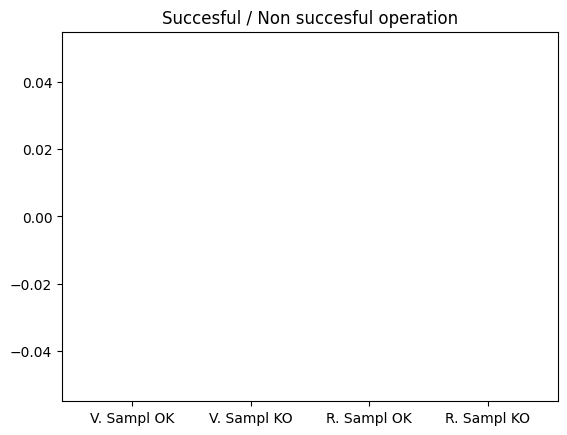

In [29]:
fig5, ax5 = plt.subplots()

rsdf = op_df.loc[(op_df['type'] == 'RandomSamplingOperation')]
rsdf_comp = rsdf.loc[(rsdf['completed'] == 'yes')]
rsdf_nocomp = rsdf.loc[(rsdf['completed'] == 'no')]

vsdf = op_df.loc[(op_df['type'] == 'ValidatorSamplingOperation')]
vsdf_comp = vsdf.loc[(vsdf['completed'] == 'yes')]
vsdf_nocomp = vsdf.loc[(vsdf['completed'] == 'no')]


vsdf_late = vsdf_comp['completion_time'][(vsdf_comp['completion_time']> 4000)]
rsdf_late = rsdf_comp['completion_time'][(rsdf_comp['completion_time']> 8000)]

#print(vsdf_late.count())
#print(rsdf_late.count())

index = [1,2,3,4]
values = []
values.append(vsdf_comp['completion_time'].count()-vsdf_late.count())
values.append(vsdf_nocomp['completion_time'].count()+vsdf_late.count())
values.append(rsdf_comp['completion_time'].count()-rsdf_late.count())
values.append(rsdf_nocomp['completion_time'].count()+rsdf_late.count())

ax5.bar(index,values)

ax5.set_xticks(range(1,5))
ax5.set_xticklabels(['V. Sampl OK','V. Sampl KO','R. Sampl OK','R. Sampl KO'])

ax5.set_title("Succesful / Non succesful operation")


Series([], Name: samples, dtype: float64)


/home/sergi/.local/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0, 'Number of samples obtained')

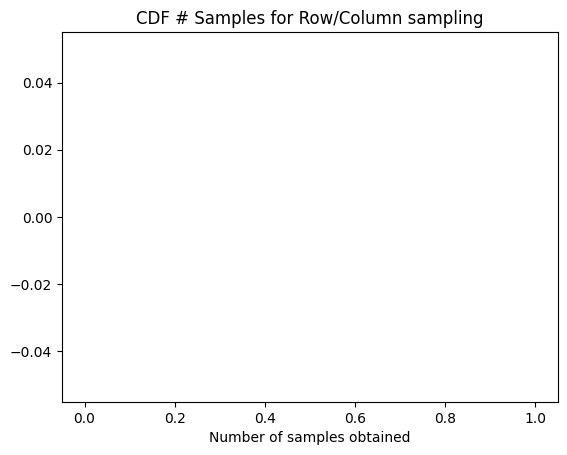

In [30]:
fig6, ax6 = plt.subplots()

n_bins = 100
vsdf = op_df.loc[(op_df['type'] == 'ValidatorSamplingOperation')]

print(vsdf['samples'].mode())

n, bins, patches = ax6.hist(vsdf['samples'], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')
#ax6.set_xlim([0,4000])
ax6.set_title("CDF # Samples for Row/Column sampling")
ax6.set_xlabel("Number of samples obtained")

Series([], Name: samples, dtype: float64)


/home/sergi/.local/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0, 'Number of samples obtained')

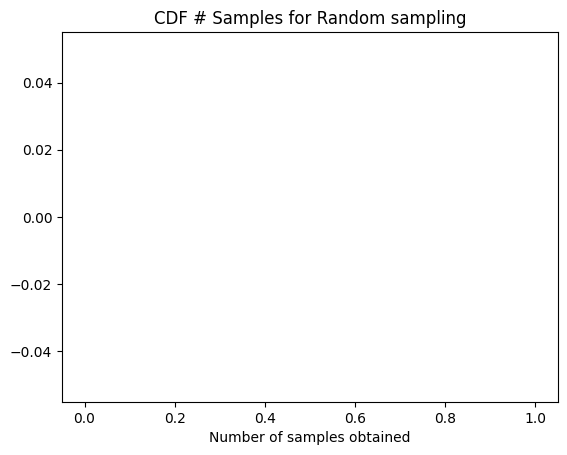

In [31]:
fig7, ax7 = plt.subplots()

n_bins = 100
vsdf = op_df.loc[(op_df['type'] == 'RandomSamplingOperation')]

print(vsdf['samples'].mode())

n, bins, patches = ax7.hist(vsdf['samples'], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')
#ax6.set_xlim([0,4000])

ax7.set_title("CDF # Samples for Random sampling")
ax7.set_xlabel("Number of samples obtained")